In [15]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
rate = 3 # This is lambda, also known as the rate parameter
distribution = sts.expon(scale=1/rate)
samples = distribution.rvs(size=100)

In [ ]:
rate_parameter = 3 # This is known as lambda in the exponential distribution
distribution = sts.expon(scale=1/rate_parameter)
sample = distribution.rvs(size=1000)

print(np.mean(sample))
print(np.var(sample))

0.33742543454952995
0.12797935153236403


In [20]:
def run_experiment(arrival_rate, departure_rate, final_time):
    '''
    Run the queueing experiment for particular arrival and departure rates.
    This will make a plot of the number of people in the queue over time.
    
    Inputs:
    
        arrival_rate (float) The rate at which new people join the back of the
          queue. Units: people per second.
        
        departure_rate (float) The rate at which people are served and leave
          the queue. Units people per second.
        
        final_time (float) Until what time to run the simulation. When the next
        arrival and departure times are later than this, the simulation will
        end. Units: seconds.

    Returns: None
    '''

    # Set up the exponential distributions for arrivals and departures
    arrival_distribution = sts.expon(scale=1/arrival_rate)
    departure_distribution = sts.expon(scale=1/departure_rate)

    people_in_queue = 0  # Start with an empty queue
    next_arrival_time = arrival_distribution.rvs()  # Generate the first arrival
    
    # We need at least 1 arrival before we can have departures so we set the
    # first departure time to infinity. This will be modified below.
    next_departure_time = np.inf  

    plot_data = {
        'time': [],
        'people_in_queue': []}
    
    while min(next_arrival_time, next_departure_time) < final_time:
        
        if next_arrival_time < next_departure_time:
            # Handle arrivals
            plot_data['time'].append(next_arrival_time)
            people_in_queue += 1
            if people_in_queue == 1:
                # We just went from an empty queue to 1 person and need to
                # generate the next departure time (because it is currently
                # infinity).
                assert next_departure_time == np.inf  # Sanity check
                next_departure_time = (
                    next_arrival_time + departure_distribution.rvs())
            # Generate the next arrival time
            next_arrival_time += arrival_distribution.rvs()
            
        else:
            # Handle departures
            plot_data['time'].append(next_departure_time)
            people_in_queue -= 1
            if people_in_queue == 0:
                # There is nobody in the queue so we should not generate a new
                # departure time.
                next_departure_time = np.inf
            else:
                # Generate the next departure time
                next_departure_time += departure_distribution.rvs()
        assert people_in_queue >= 0  # Sanity check
        plot_data['people_in_queue'].append(people_in_queue)
        
    # Make the plot of the queue length over time
    plt.figure()
    plt.title('Simulated queue length over time')
    plt.plot(plot_data['time'], plot_data['people_in_queue'],"k.")
    plt.xlabel('time [s]')
    plt.ylabel('queue length')
    plt.show()


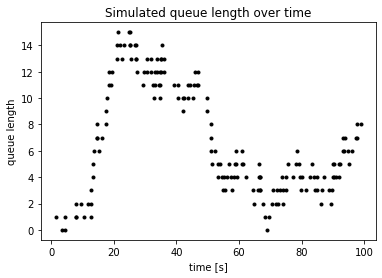

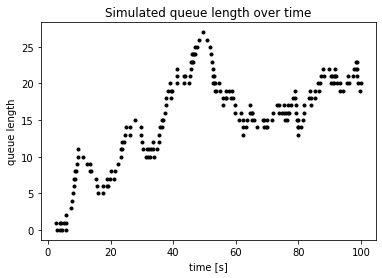

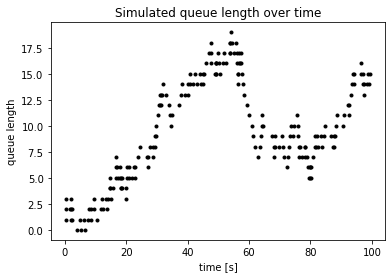

In [21]:
arrival_rate = 1
departure_rate = 1
final_time = 100

# Run the simulation 3 times to see different random results
for i in range(3):
	run_experiment(arrival_rate, departure_rate, final_time)